### Multiple Linear Regression

- one dependant variable and multiple independent variables
- y=b0+b1x1+b2x2.......+bnxn
- price of the house
### Process using sklearn

- Read the data
- Cleaning/analyzing
- Seperate the features and target
- split the data for Train/test
- select the required model
- fit our training data
- predict the data using testdata
- compare the actual and predicted data
- evaluation metrics

In [1]:
#reading the data
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/FuelConsumptionCo2.csv")

In [2]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
data.shape

(1067, 13)

In [4]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [5]:
data["MODELYEAR"].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [6]:
x=data[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y=data["CO2EMISSIONS"]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)
x_train

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
733,15.4,11.0,13.4
671,15.1,10.3,12.9
344,24.1,19.2,21.9
675,12.7,9.1,11.1
200,9.5,6.5,8.2
...,...,...,...
255,9.4,7.0,8.3
886,10.7,7.4,9.2
143,10.2,8.0,9.2
474,23.3,16.1,20.1


In [8]:
x_test

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
119,16.2,10.9,13.8
450,21.3,14.3,18.2
469,16.0,11.1,13.8
239,14.6,10.3,12.7
572,12.5,8.8,10.8
...,...,...,...
596,14.1,11.1,12.8
1005,17.6,12.9,15.5
853,9.1,8.5,8.8
28,13.1,8.8,11.2


In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(x_test)
y_pred

array([296.85976626, 366.46566403, 293.0023507 , 273.8648673 ,
       245.14634293, 268.60880516, 303.64351407, 223.08252727,
       219.65738279, 223.98236162, 276.48796756, 315.36939834,
       236.43388735, 221.5548416 , 184.62267389, 290.57483069,
       272.03394964, 198.07182409, 228.12245387, 265.78026304,
       237.95087933, 253.64266297, 190.78926405, 367.9933497 ,
       219.65738279, 276.82244851, 249.68745729, 267.23071387,
       199.37268054, 297.19424721, 367.9933497 , 274.19934824,
       229.65013954, 213.47023735, 195.73140052, 231.04878612,
       226.00885952, 329.84742197, 334.00806951, 353.54657503,
       229.86627508, 232.9774939 , 303.82840064, 318.05903977,
       258.08598721, 236.21775181, 242.12222055, 191.62255723,
       296.85976626, 214.25172628, 189.0766918 , 235.22012734,
       198.97165843, 252.04843614, 367.1806118 , 275.67522966,
       270.25483624, 237.36497065, 316.16158095, 240.75886617,
       319.70507085, 241.90608502, 147.54091179, 257.58

In [11]:
model.predict([[6.0,5.8,5.9]])

array([152.11327512])

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)*100

79.7396580477286

In [13]:
mean_squared_error(y_test,y_pred)**0.5

28.442165463114474

In [14]:
model.intercept_

78.57272695721005

In [15]:
model.coef_

array([10.28873435, -8.99834343, 10.84720914])

### Polynomial regression

In [17]:
data=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/china_gdp.csv")

In [18]:
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [19]:
data.shape

(55, 2)

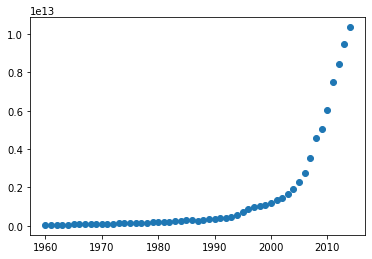

In [20]:
import matplotlib.pyplot as plt
plt.scatter(data["Year"],data["Value"])
plt.show()

In [21]:
x=data["Year"].values.reshape(-1,1)
y=data["Value"].values

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [23]:
y_pred=model.predict(x_poly)

In [24]:
r2_score(y,y_pred)*100

96.45101048459287

In [25]:
mean_squared_error(y,y_pred)


2.177936478244266e+23

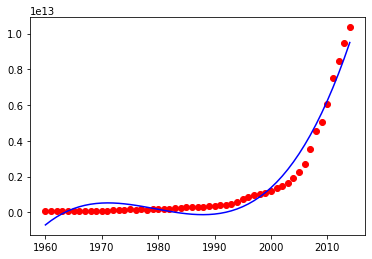

In [26]:
plt.scatter(data["Year"],data["Value"],c="red")
plt.plot(x,y_pred,c="blue")
plt.show()

In [27]:
acc=[]
for i in range(2,20):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    y_pred=model.predict(x_poly)
    acc.append(r2_score(y,y_pred)*100)

In [28]:
acc

[84.2444347417096,
 96.45101048459287,
 96.51202302090205,
 96.57218086582708,
 96.63149021264236,
 96.68995728756254,
 96.74758835406126,
 96.80438971141378,
 96.86036769387391,
 96.91552866496001,
 96.96987902240123,
 97.02342519206792,
 97.07617362680342,
 97.12813080737925,
 97.17930323891486,
 97.22969745112191,
 97.27931999522599,
 97.32817744348183]

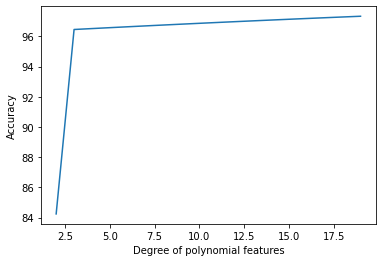

In [29]:
import numpy as np
plt.plot(np.arange(2,20),acc)
plt.xlabel("Degree of polynomial features")
plt.ylabel('Accuracy')
plt.show()